In [1]:
# Feature importance

In [2]:
# Feature importance from model coecients.
# Feature importance from decision trees.
# Feature importance from permutation testing.

Feature:  0 Score:  0.0
Feature:  1 Score:  0.0
Feature:  2 Score:  -5.3290705182007514e-14
Feature:  3 Score:  1.3589129821411916e-13
Feature:  4 Score:  71.39584960110584
Feature:  5 Score:  59.184645032220175
Feature:  6 Score:  53.33382343927349
Feature:  7 Score:  37.603887221727675
Feature:  8 Score:  3.3580957958260544
Feature:  9 Score:  -1.7319479184152442e-14


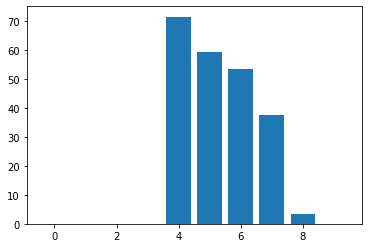

In [3]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=10000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: ',i,'Score: ',v)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [4]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


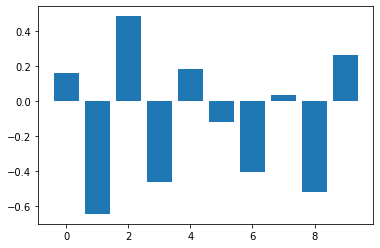

In [8]:
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00254
Feature: 1, Score: 0.00464
Feature: 2, Score: 0.00157
Feature: 3, Score: 0.00171
Feature: 4, Score: 0.51784
Feature: 5, Score: 0.43744
Feature: 6, Score: 0.02778
Feature: 7, Score: 0.00245
Feature: 8, Score: 0.00250
Feature: 9, Score: 0.00153


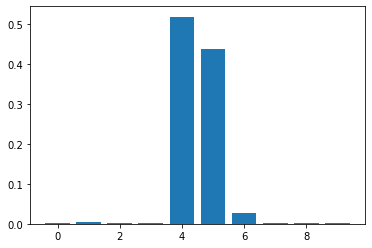

In [9]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance from decision tree or random forest
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

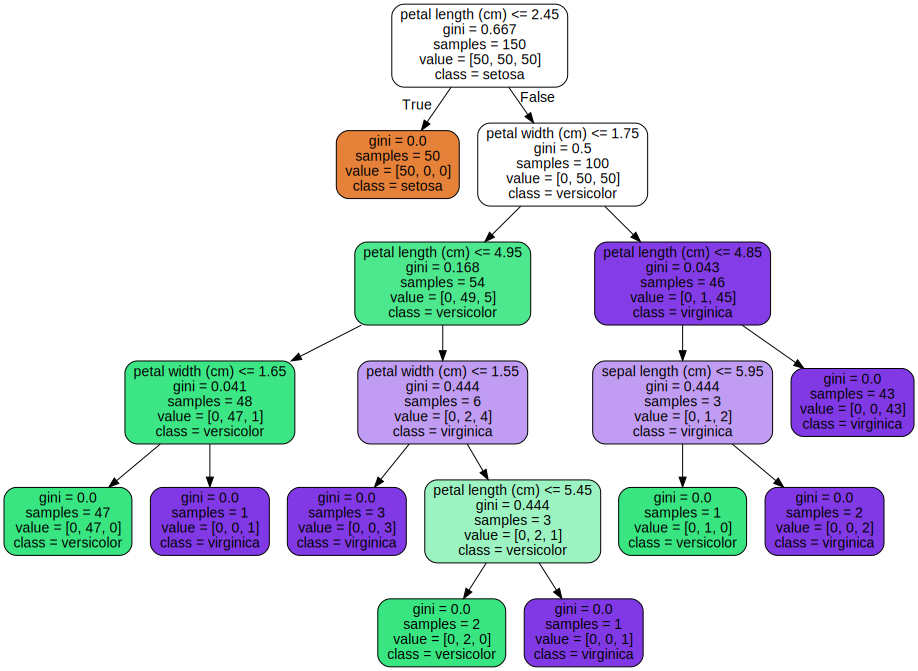

In [26]:
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source
Source.from_file("iris_tree.dot")

In [ ]:
# Permutation feature importance is a technique 
# for calculating relative importance scores that is independent of the model used.

Feature: 0, Score: 110.55568
Feature: 1, Score: 326.56283
Feature: 2, Score: 131.16233
Feature: 3, Score: 67.46107
Feature: 4, Score: 9577.32236
Feature: 5, Score: 8324.85285
Feature: 6, Score: 892.94858
Feature: 7, Score: 156.26595
Feature: 8, Score: 154.15485
Feature: 9, Score: 122.96697


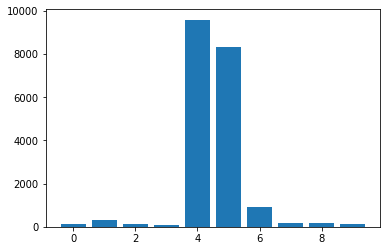

In [28]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05200
Feature: 1, Score: 0.06040
Feature: 2, Score: 0.05960
Feature: 3, Score: 0.09200
Feature: 4, Score: 0.05100
Feature: 5, Score: 0.05880
Feature: 6, Score: 0.07840
Feature: 7, Score: 0.05660
Feature: 8, Score: 0.05020
Feature: 9, Score: 0.02980


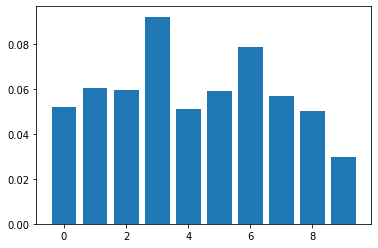

In [29]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Feature Selection with Importance

In [30]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55
